In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import astropy
from astropy import units as u
from astropy import constants as const

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Final-Project/Pleiades_Cluster.csv")
df.head()

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623


In [3]:
gmag=np.asarray(df['gmag']) #Apparent magnitude

In [4]:
ra=np.asarray(df['ra'])#Right Ascension

In [5]:
dec=np.asarray(df['dec'])#Declination

In [6]:
plx=np.asarray(df['plx'])#parralax

In [7]:
bp_rp=np.asarray(df['bp_rp'].dropna())#color
color=np.delete(bp_rp,79)

In [8]:
lum_val=np.asarray(df['lum_val'].dropna())#luminosity

In [9]:
teff_val=np.asarray(df['teff_val'].dropna())#Effective temparature

In [10]:
radius_val=np.asarray(df['radius_val'].dropna())#Effective Radius

In [11]:
d=1000/plx#distance array
LY=d*3.26
print(np.average(LY),"Light Years")

469.0759590218662 Light Years


In [12]:
M1=gmag-5*(np.log10(d)-1)#distance formula magnitude relation

In [13]:
index=[48,79,150,185,201,430,469,483,624,712,717,751,860,903,925,949,971]
M1_new=np.delete(M1,index)#Adjust visual magnitude array by excluding false values

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


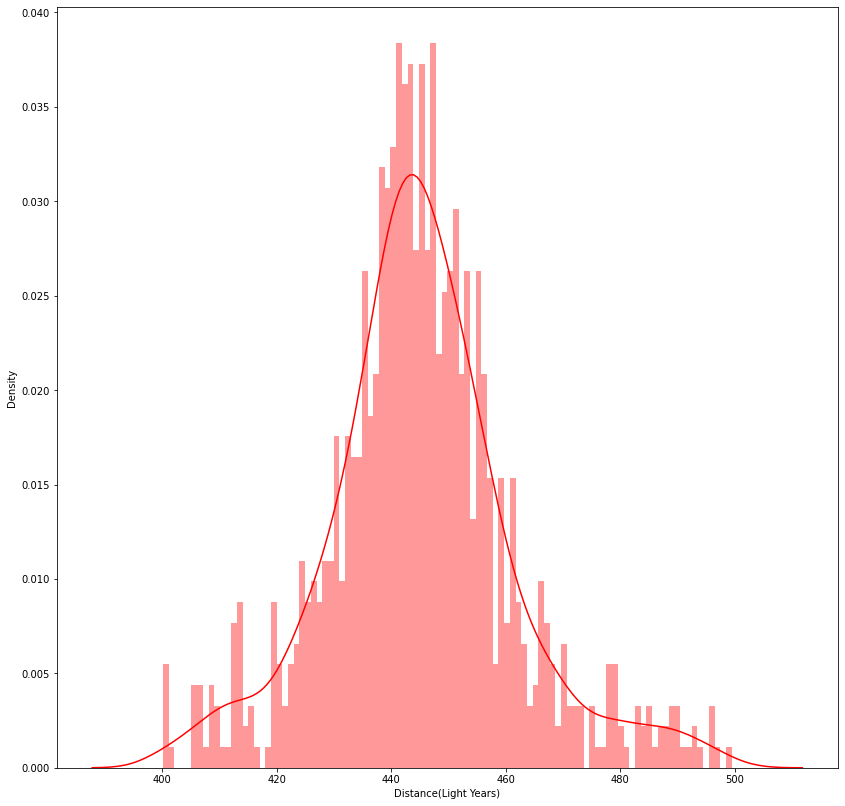

445.0184983541607 Light Years


In [14]:
LY1=list()
for i in range(len(LY)):
    if 400<LY[i]<500:
        LY1.append(LY[i])
LY1_n=np.asarray(LY1)

figA=plt.figure(figsize=(14,14))
sns.distplot(LY1_n,color='red',bins=100)
plt.xlabel("Distance(Light Years)")
plt.show()

print(np.average(LY1_n),"Light Years")

In [15]:
#Projection problem with size as related to brightnes

In [16]:
brightness=np.max(gmag)-gmag

In [17]:
ra = (ra*np.pi)/180
for i in range(len(ra)):
    ra[i]=ra[i]%(2*np.pi)
    if ra[i]<0:
        ra[i]=ra[i]+2*np.pi
    if ra[i]>np.pi:
        ra[i]=ra[i]-2*np.pi
dec=(dec*np.pi)/180                        #.............................degs to radians
for i in range(len(dec)):
    dec[i]=dec[i]%np.pi
    if dec[i]<0:
        dec[i]=dec[i]+np.pi
    if dec[i]>np.pi/2:
        dec[i]=dec[i]-np.pi

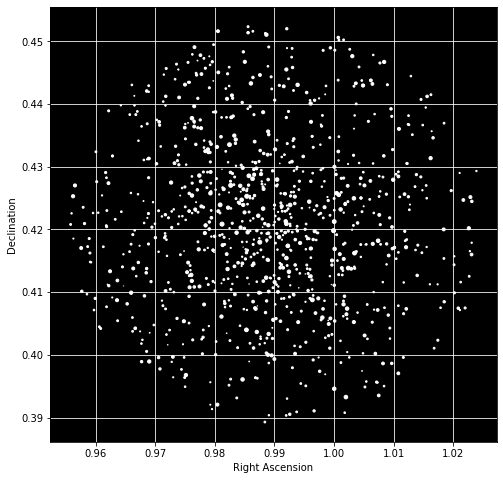

In [18]:
fig2=plt.figure(figsize=(8,8))
ax2=fig2.add_subplot(facecolor='black')
ax2.grid(c='white')
ax2.set_xlabel("Right Ascension")
ax2.set_ylabel("Declination")
plt.scatter(ra,dec,s=brightness,c='white')

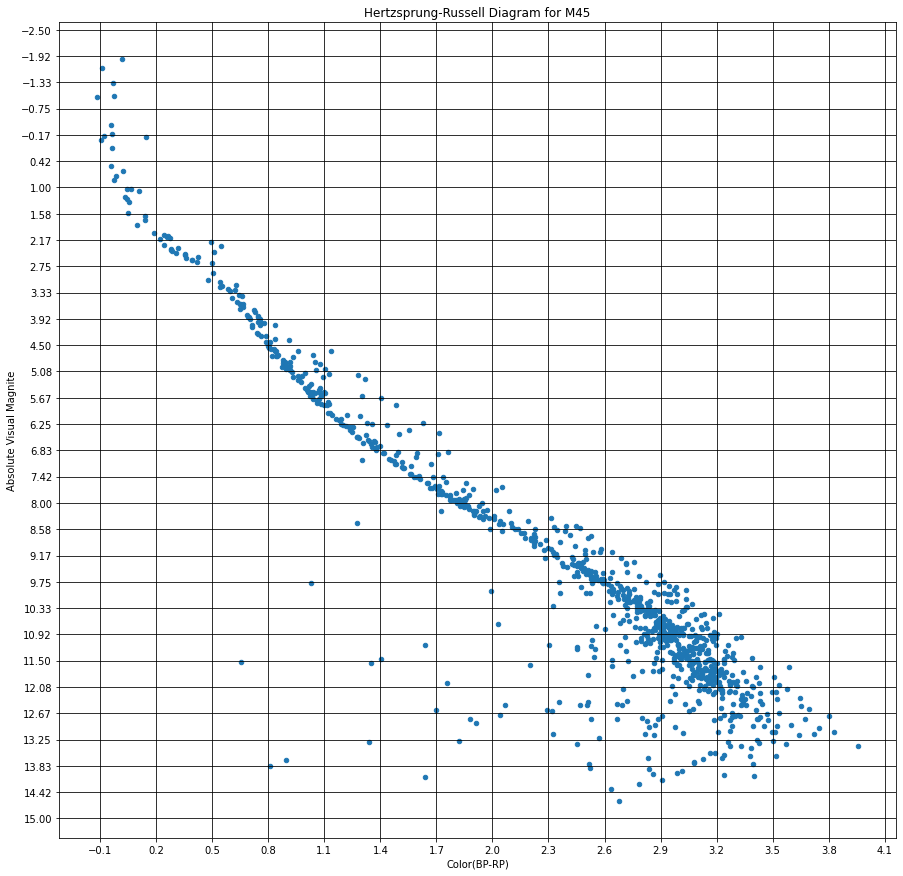

In [19]:
fig1,ax1=plt.subplots(figsize=(15,15))
ax1.invert_yaxis()
ax1.grid(c='black')
ax1.set_title("Hertzsprung-Russell Diagram for M45")
ax1.set_xticks(np.linspace(-1,5,21))
ax1.set_yticks(np.linspace(-2.5,15,31))
ax1.set_xlabel("Color(BP-RP)")
ax1.set_ylabel("Absolute Visual Magnite")
plt.scatter(color,M1_new,s=20,cmap='virdis')

In [20]:
#project to draw a colourmap based scatter pot for the HR diagram

In [21]:
T_k=5601/((bp_rp+0.4)**(2/3))
T_k = T_k[~np.isnan(T_k)]
print(np.average(T_k),T_k.size)

3272.101332350972 970


<ipython-input-21-ea68b630c99b>:1: RuntimeWarning: invalid value encountered in power
  T_k=5601/((bp_rp+0.4)**(2/3))


In [22]:
L_fin=10**((0.4)*(4.77-M1_new))

In [23]:
R_fin=((5800**2)*(L_fin**(1/2)))/(T_k**2)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Hertzsprung-Russell Diagram'}>

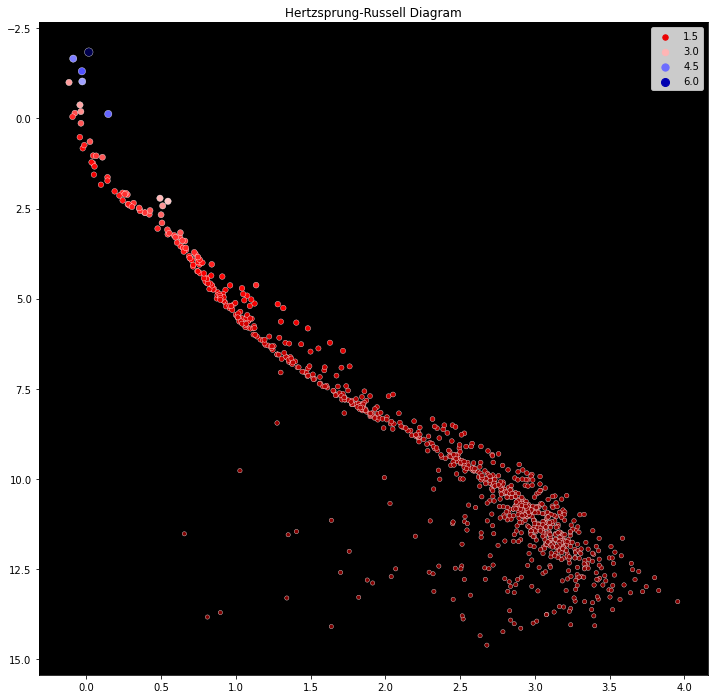

In [24]:
fig3=plt.figure(figsize=(12,12))
ax=plt.axes()
ax.set_facecolor('black')
ax.invert_yaxis()
ax.set_title("Hertzsprung-Russell Diagram")
sns.scatterplot(color,M1_new,hue=R_fin,size=R_fin,palette='seismic_r')

In [25]:
print("Effective colour turnoff for the above colour map occurs around 2.5--0.0 visual magnitude.")
print("This occurs in the age range of 1.6e8--1.9e9")
print("Upon comparison with the ZAMS,we get the turnoff point to around 2e8 years")

Effective colour turnoff for the above colour map occurs around 2.5--0.0 visual magnitude.
This occurs in the age range of 1.6e8--1.9e9
Upon comparison with the ZAMS,we get the turnoff point to around 2e8 years
